In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_excel("National_Accidents_Australia.xlsx")

In [3]:
label_encoder = LabelEncoder()
data['Month'] = label_encoder.fit_transform(data['Month'])
data['ABS remoteness area'] = label_encoder.fit_transform(data['ABS remoteness area'])
data['Cause of injury'] = label_encoder.fit_transform(data['Cause of injury'])
data['Age group'] = label_encoder.fit_transform(data['Age group'])
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Road user'] = label_encoder.fit_transform(data['Road user'])
data['Counterparty'] = label_encoder.fit_transform(data['Counterparty'])



In [4]:
data['Died_cases'].fillna(0, inplace=True)

data['Died_bed_days'].fillna(0, inplace=True)

data.dropna(subset=['Count of cases'], inplace=True)


data.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,0,0,0,0,0,8,5,765.0,1007,0.0,0.0,765
1,2011,0,0,0,0,1,8,5,1010.0,1694,0.0,0.0,1010
2,2011,0,0,0,1,0,8,5,859.0,1597,0.0,0.0,859
3,2011,0,0,0,1,1,8,5,2231.0,3878,2.0,3.0,2229
4,2011,0,0,0,2,0,8,5,1098.0,2347,1.0,14.0,1097


In [5]:
data['Bed_days_category'] = np.where(data['Bed days'] >= 30, 1, 0)
data['Bed_days_category'].value_counts()

0    74918
1    38064
Name: Bed_days_category, dtype: int64

In [6]:
data['Road user'].value_counts()

8     31420
1     16055
2     14876
10    14309
7     13975
11     7378
3      4723
9      2904
12     2339
4      2306
0      1800
5       512
6       385
Name: Road user, dtype: int64

# CLASSIFICATION Normaly

In [7]:
X = data[['ABS remoteness area','Age group','Sex','Road user','Cause of injury']]
y = data['Bed_days_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42,scale_pos_weight=1.5)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.7608983995048192
0.7506760882840443
0.7557526787282628
[[19728  2704]
 [ 2858  8605]]
0    74918
1    38064
Name: Bed_days_category, dtype: int64
0.8359050007375719


# CLASSIFICATION WITH ROAD USERS 8---> Not applicable

# CLASSIFICATION WITH ROAD USERS 1---> Car driver                          


In [9]:
filtered_data = data[data['Road user'] == 1]
filtered_data.head()
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

xgb_classifier = XGBClassifier(scale_pos_weight=1.5)
xgb_classifier.fit(X_train, y_train)

y_predxgb = xgb_classifier.predict(X_test)

precision_xgb = precision_score(y_test,y_predxgb)
recall_xgb= recall_score(y_test, y_predxgb)
f1_xgb= f1_score(y_test,y_predxgb)
accuracy_xgb = accuracy_score(y_test, y_predxgb)

print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_predxgb))
print(y.value_counts())
print(accuracy_xgb)


0.7602070155261644
0.805606337599025
0.7822485207100591
[[2759  417]
 [ 319 1322]]
0    10490
1     5565
Name: Bed days, dtype: int64
0.8472078056881877


# CLASSIFICATION WITH ROAD USERS 2---> Car passenger                          


In [10]:
filtered_data = data[data['Road user'] == 2]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

xgb_classifier = XGBClassifier(random_state=42,scale_pos_weight=3.5)
xgb_classifier.fit(X_train, y_train)

y_predxgb = xgb_classifier.predict(X_test)

precision_xgb = precision_score(y_test,y_predxgb)
recall_xgb= recall_score(y_test, y_predxgb)
f1_xgb= f1_score(y_test,y_predxgb)
accuracy_xgb = accuracy_score(y_test, y_predxgb)

print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_predxgb))
print(y.value_counts())
print(accuracy_xgb)


0.4151658767772512
0.6384839650145773
0.5031591039632395
[[3160  617]
 [ 248  438]]
0    12481
1     2395
Name: Bed days, dtype: int64
0.8061841810441407


# CLASSIFICATION WITH ROAD USERS 2---> Pedal cyclist                         


In [11]:
filtered_data = data[data['Road user'] == 10]
filtered_data.head()
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

xgb_classifier = XGBClassifier(random_state=42,scale_pos_weight=4)
xgb_classifier.fit(X_train, y_train)

y_predxgb = xgb_classifier.predict(X_test)

precision_xgb = precision_score(y_test,y_predxgb)
recall_xgb= recall_score(y_test, y_predxgb)
f1_xgb= f1_score(y_test,y_predxgb)
accuracy_xgb = accuracy_score(y_test, y_predxgb)

print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_predxgb))
print(y.value_counts())
print(accuracy_xgb)


0.5503759398496241
0.6678832116788321
0.6034624896949712
[[3446  299]
 [ 182  366]]
0    12505
1     1804
Name: Bed days, dtype: int64
0.8879571395294665


# CLASSIFICATION WITH ROAD USERS 7---> Motorcyclist                          


In [12]:
filtered_data = data[data['Road user'] == 7]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

xgb_classifier = XGBClassifier(random_state=42,scale_pos_weight=2)
xgb_classifier.fit(X_train, y_train)

y_predxgb = xgb_classifier.predict(X_test)

precision_xgb = precision_score(y_test,y_predxgb)
recall_xgb= recall_score(y_test, y_predxgb)
f1_xgb= f1_score(y_test,y_predxgb)
accuracy_xgb = accuracy_score(y_test, y_predxgb)

print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_predxgb))
print(y.value_counts())
print(accuracy_xgb)

0.7634892086330936
0.7473591549295775
0.7553380782918149
[[2794  263]
 [ 287  849]]
0    10196
1     3779
Name: Bed days, dtype: int64
0.8688290007154782


# CLASSIFICATION WITH ROAD USERS 11 ===> Pedestrian  

In [13]:
filtered_data = data[data['Road user'] == 11]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

y_predxgb = xgb_classifier.predict(X_test)

precision_xgb = precision_score(y_test,y_predxgb)
recall_xgb= recall_score(y_test, y_predxgb)
f1_xgb= f1_score(y_test,y_predxgb)
accuracy_xgb = accuracy_score(y_test, y_predxgb)

print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_predxgb))
print(y.value_counts())
print(accuracy_xgb)

0.851258581235698
0.5904761904761905
0.697282099343955
[[1519   65]
 [ 258  372]]
0    5330
1    2048
Name: Bed days, dtype: int64
0.8541102077687444


# Comparis

In [14]:


classifier_names = [ "Car driver", "Car passenger", "Pedal cyclist", "Motorcyclist", "Pedestrian"]

f1_scores = [ '78%', '51%', '60%', '75%', '69%']

result_df = pd.DataFrame({'Classifier': classifier_names, 'F1 Score': f1_scores})

print(result_df)


      Classifier F1 Score
0     Car driver      78%
1  Car passenger      51%
2  Pedal cyclist      60%
3   Motorcyclist      75%
4     Pedestrian      69%


In [15]:
classifier_names = [ "Car driver", "Car passenger", "Pedal cyclist", "Motorcyclist", "Pedestrian"]
imbalance_ratios = [ 1.88, 5.21, 6.94, 2.70, 2.60]
result_df = pd.DataFrame({'Classifier': classifier_names, 'Imbalanced Rate': imbalance_ratios})
print(result_df)


      Classifier  Imbalanced Rate
0     Car driver             1.88
1  Car passenger             5.21
2  Pedal cyclist             6.94
3   Motorcyclist             2.70
4     Pedestrian             2.60


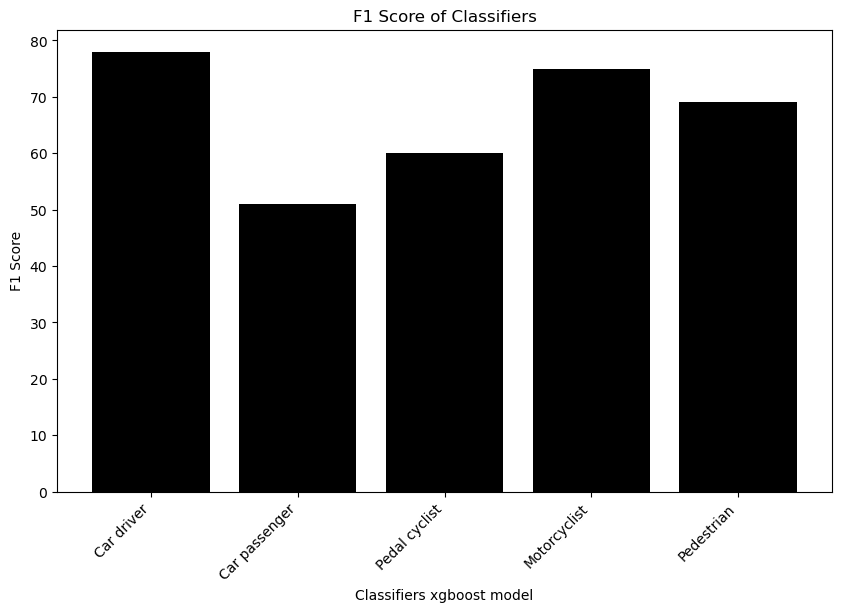

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

classifier_names = [ "Car driver", "Car passenger", "Pedal cyclist", "Motorcyclist", "Pedestrian"]

f1_scores = [ 78, 51, 60, 75, 69]

result_df = pd.DataFrame({'Classifier': classifier_names, 'F1 Score': f1_scores})

plt.figure(figsize=(10, 6))
plt.bar(result_df['Classifier'], result_df['F1 Score'], color='black')
plt.title('F1 Score of Classifiers')
plt.xlabel('Classifiers xgboost model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')

plt.show()


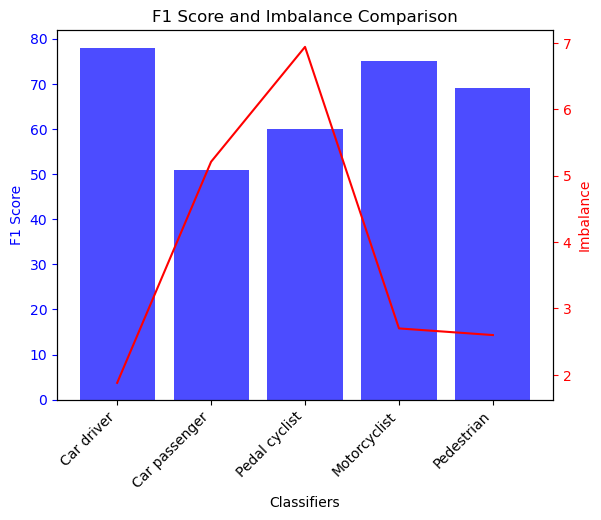

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

classifier_names = [ "Car driver", "Car passenger", "Pedal cyclist", "Motorcyclist", "Pedestrian"]
f1_scores = [ 78, 51, 60, 75, 69]
imbalance_ratios = [ 1.88, 5.21, 6.94, 2.70, 2.60]

x_positions = range(len(classifier_names))

fig, ax1 = plt.subplots()

ax1.bar(x_positions, f1_scores, color='b', alpha=0.7, label='F1 Score')
ax1.set_xlabel('Classifiers')
ax1.set_ylabel('F1 Score', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x_positions, imbalance_ratios, 'r-', label='Imbalance')
ax2.set_ylabel('Imbalance', color='r')
ax2.tick_params('y', colors='r')

ax1.set_xticks(x_positions)
ax1.set_xticklabels(classifier_names, rotation=45, ha='right')

plt.title('F1 Score and Imbalance Comparison')
plt.show()


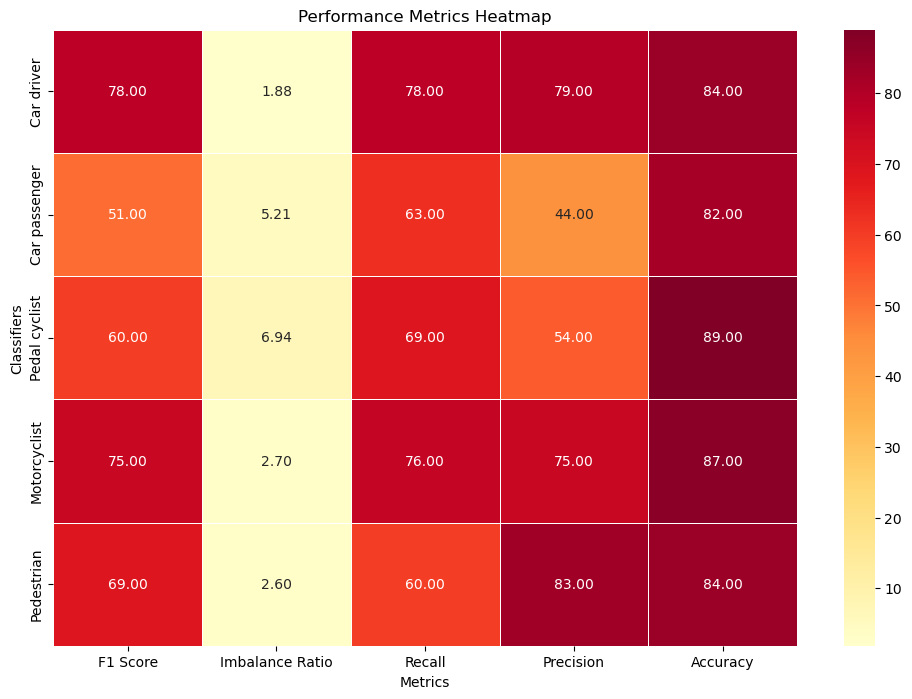

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

classifier_names = [ "Car driver", "Car passenger", "Pedal cyclist", "Motorcyclist", "Pedestrian"]
f1_scores = [ 78, 51, 60, 75, 69]
imbalance_ratios = [ 1.88, 5.21, 6.94, 2.70, 2.60]
recall_scores = [ 78, 63, 69, 76, 60]  
precision_scores = [79, 44, 54, 75, 83] 
accuracy_scores = [ 84, 82, 89, 87, 84]  
data = {
    'Classifier': classifier_names,
    'F1 Score': f1_scores,
    'Imbalance Ratio': imbalance_ratios,
    'Recall': recall_scores,
    'Precision': precision_scores,
    'Accuracy': accuracy_scores
}
df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df.set_index('Classifier'), annot=True, cmap="YlOrRd", fmt=".2f", linewidths=.5)

heatmap.set_xlabel('Metrics')
heatmap.set_ylabel('Classifiers')

plt.title('Performance Metrics Heatmap')
plt.show()


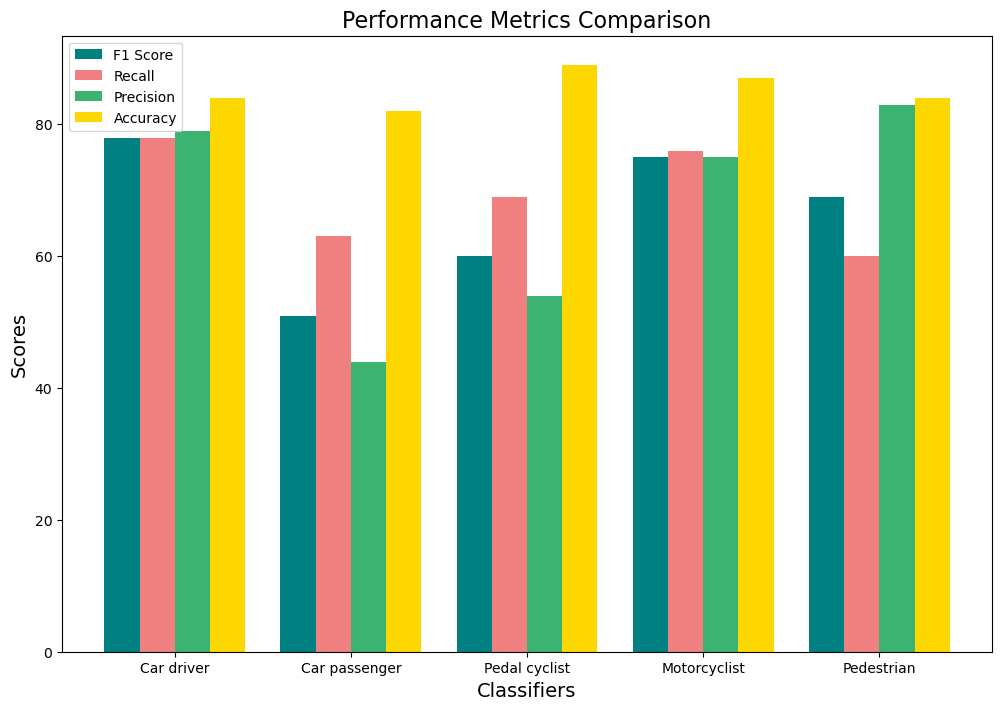

In [19]:
import matplotlib.pyplot as plt
import numpy as np

classifier_names = [ "Car driver", "Car passenger", "Pedal cyclist", "Motorcyclist", "Pedestrian"]
f1_scores = [ 78, 51, 60, 75, 69]
recall_scores = [ 78, 63, 69, 76, 60]  
precision_scores = [79, 44, 54, 75, 83] 
accuracy_scores = [ 84, 82, 89, 87, 84]  

num_metrics = len(f1_scores)

x_positions = np.arange(num_metrics)

bar_width = 0.2

plt.figure(figsize=(12, 8))
plt.bar(x_positions, f1_scores, width=bar_width, label='F1 Score', color='teal')
plt.bar(x_positions + bar_width, recall_scores, width=bar_width, label='Recall', color='lightcoral')
plt.bar(x_positions + 2 * bar_width, precision_scores, width=bar_width, label='Precision', color='mediumseagreen')
plt.bar(x_positions + 3 * bar_width, accuracy_scores, width=bar_width, label='Accuracy', color='gold')

plt.xticks(x_positions + 1.5 * bar_width, classifier_names)

plt.title('Performance Metrics Comparison', fontsize=16)
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Scores', fontsize=14)

plt.legend()

plt.show()


# Comparis XGBOOST vs CNN vs PERCEPTRON 

1- Car driver

<Figure size 1200x800 with 0 Axes>

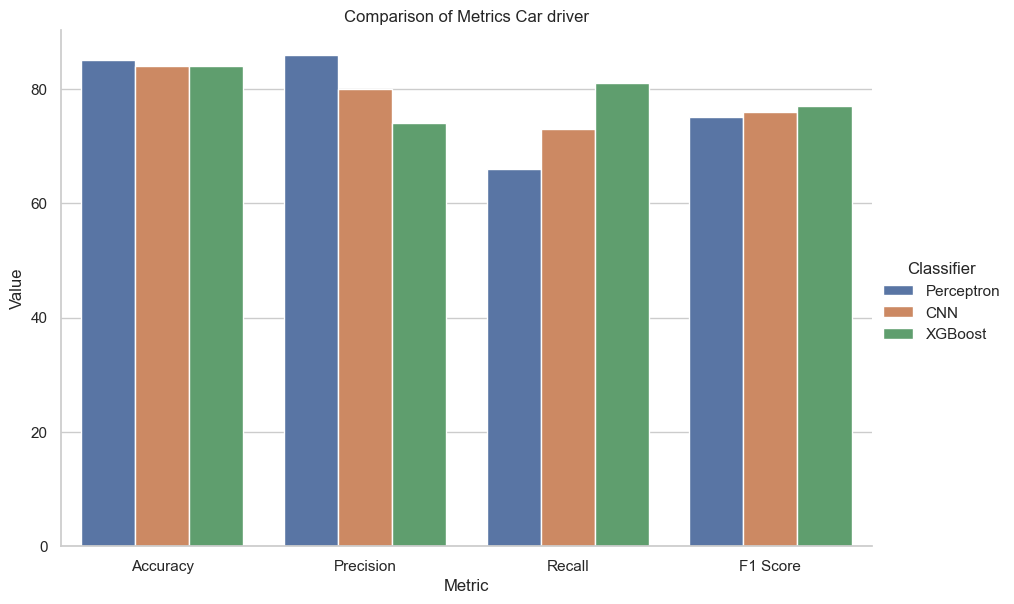

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

classifiers = ["Perceptron", "CNN", "XGBoost"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

data = {
    "Classifier": sum([[c] * len(metrics) for c in classifiers], []),
    "Metric": metrics * len(classifiers),
    "Value": [85, 86, 66, 75,
              84, 80, 73, 76,
              84, 74, 81, 77]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

g = sns.catplot(
    x="Metric", y="Value", hue="Classifier",
    data=df, kind="bar",
    height=6, aspect=1.5
)

plt.title('Comparison of Metrics Car driver')

plt.show()


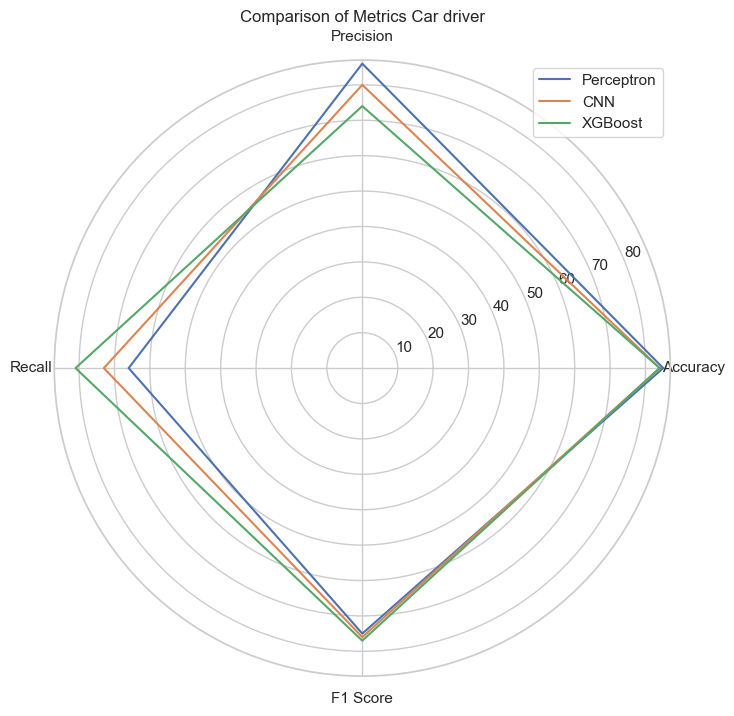

In [23]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
perceptron_values = [85, 86, 66, 75]
cnn_values = [84, 80, 73, 76]
xgboost_values = [84, 74, 81, 77]

num_dimensions = len(labels)

angles = np.linspace(0, 2 * np.pi, num_dimensions, endpoint=False).tolist()

angles += angles[:1]

plt.figure(figsize=(8, 8))

plt.polar(angles, perceptron_values + perceptron_values[:1], label='Perceptron')
plt.polar(angles, cnn_values + cnn_values[:1], label='CNN')
plt.polar(angles, xgboost_values + xgboost_values[:1], label='XGBoost')

plt.xticks(angles[:-1], labels)

plt.title('Comparison of Metrics Car driver')

plt.legend()

plt.show()


2- Car passenger                          


<Figure size 1200x800 with 0 Axes>

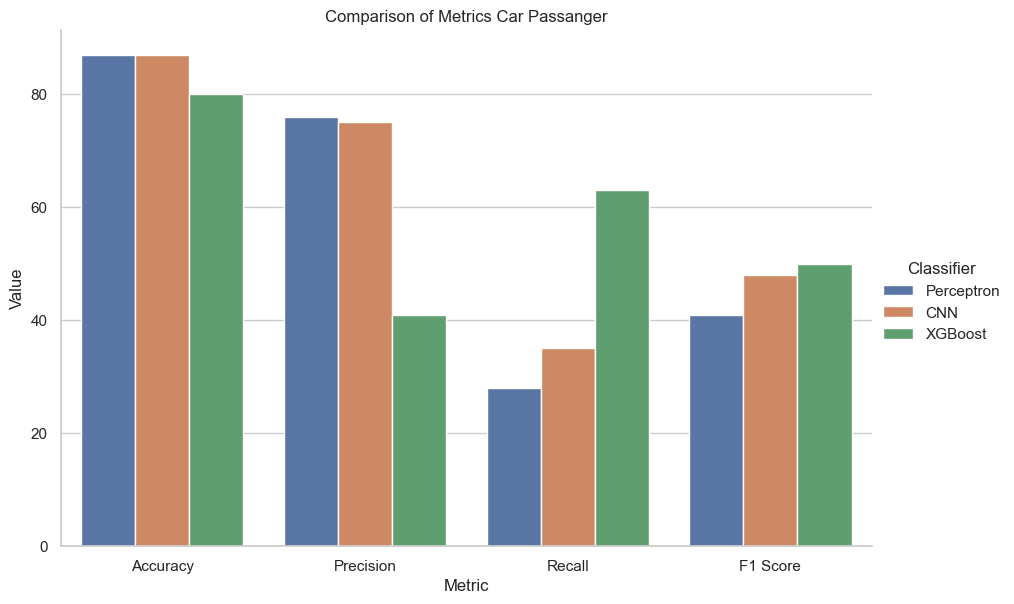

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

classifiers = ["Perceptron", "CNN", "XGBoost"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

data = {
    "Classifier": sum([[c] * len(metrics) for c in classifiers], []),
    "Metric": metrics * len(classifiers),
    "Value": [87, 76, 28, 41,
              87, 75, 35, 48,
              80, 41, 63, 50]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

g = sns.catplot(
    x="Metric", y="Value", hue="Classifier",
    data=df, kind="bar",
    height=6, aspect=1.5
)

plt.title('Comparison of Metrics Car Passanger')

plt.show()


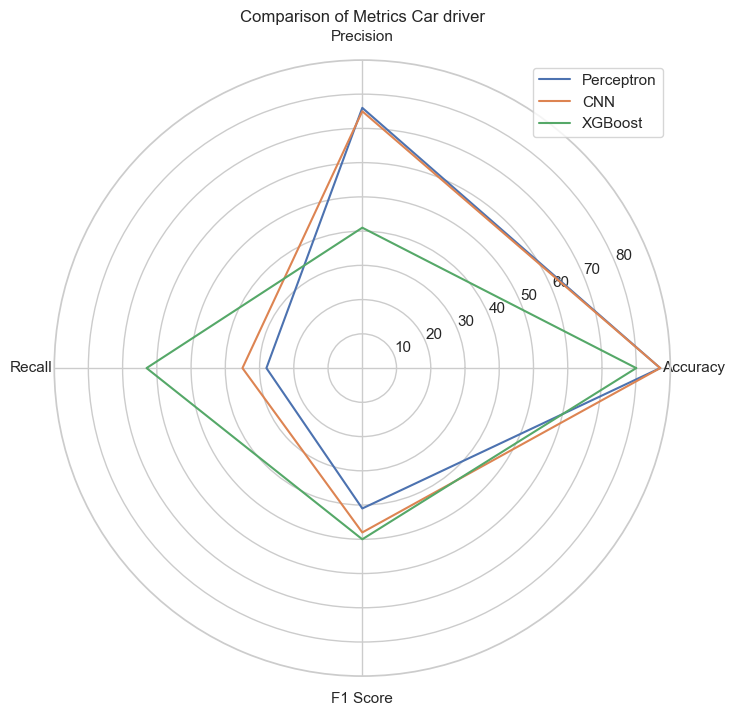

In [26]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
perceptron_values = [87, 76, 28, 41]
cnn_values = [87, 75, 35, 48]
xgboost_values = [80, 41, 63, 50]

num_dimensions = len(labels)

angles = np.linspace(0, 2 * np.pi, num_dimensions, endpoint=False).tolist()

angles += angles[:1]

plt.figure(figsize=(8, 8))

plt.polar(angles, perceptron_values + perceptron_values[:1], label='Perceptron')
plt.polar(angles, cnn_values + cnn_values[:1], label='CNN')
plt.polar(angles, xgboost_values + xgboost_values[:1], label='XGBoost')

plt.xticks(angles[:-1], labels)

plt.title('Comparison of Metrics Car driver')

plt.legend()

plt.show()


3- Pedal cyclist

<Figure size 1200x800 with 0 Axes>

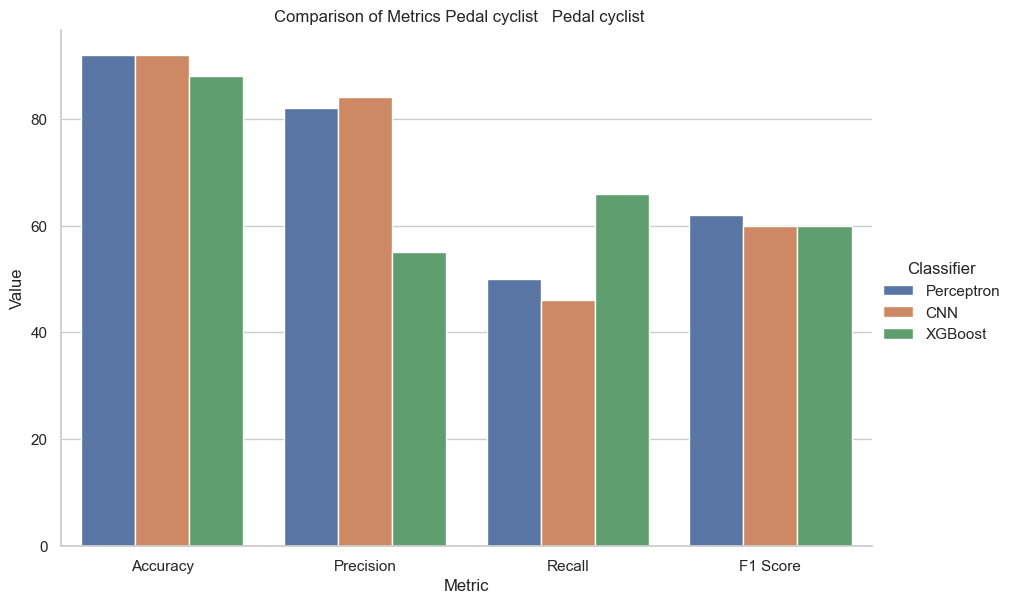

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

classifiers = ["Perceptron", "CNN", "XGBoost"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

data = {
    "Classifier": sum([[c] * len(metrics) for c in classifiers], []),
    "Metric": metrics * len(classifiers),
    "Value": [92, 82, 50, 62,
              92, 84, 46, 60,
              88, 55, 66, 60]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

g = sns.catplot(
    x="Metric", y="Value", hue="Classifier",
    data=df, kind="bar",
    height=6, aspect=1.5
)

plt.title('Comparison of Metrics Pedal cyclist   Pedal cyclist   ')

plt.show()


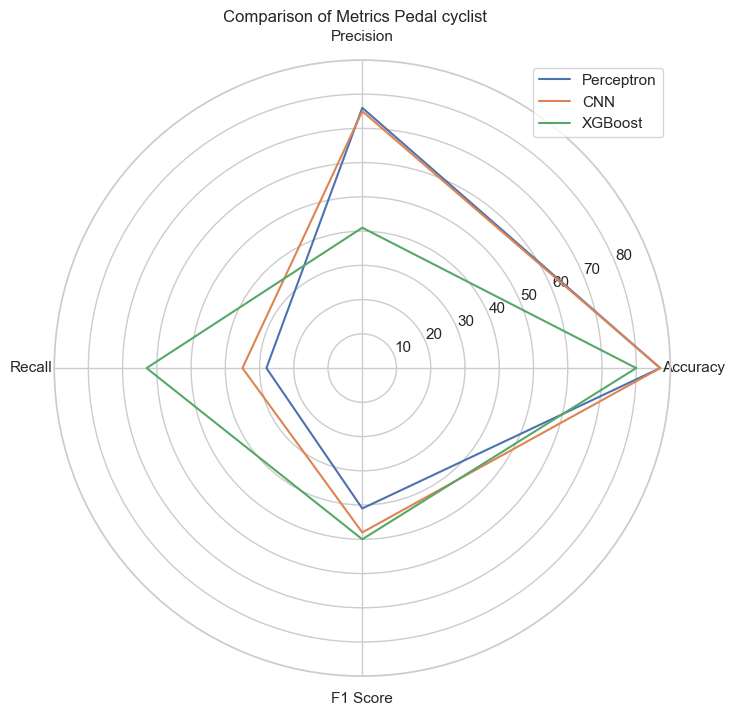

In [29]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
perceptron_values = [87, 76, 28, 41]
cnn_values = [87, 75, 35, 48]
xgboost_values = [80, 41, 63, 50]

num_dimensions = len(labels)

angles = np.linspace(0, 2 * np.pi, num_dimensions, endpoint=False).tolist()

angles += angles[:1]

plt.figure(figsize=(8, 8))

plt.polar(angles, perceptron_values + perceptron_values[:1], label='Perceptron')
plt.polar(angles, cnn_values + cnn_values[:1], label='CNN')
plt.polar(angles, xgboost_values + xgboost_values[:1], label='XGBoost')

plt.xticks(angles[:-1], labels)

plt.title('Comparison of Metrics Pedal cyclist   ')

plt.legend()

plt.show()


4-Motorcyclist¶

<Figure size 1200x800 with 0 Axes>

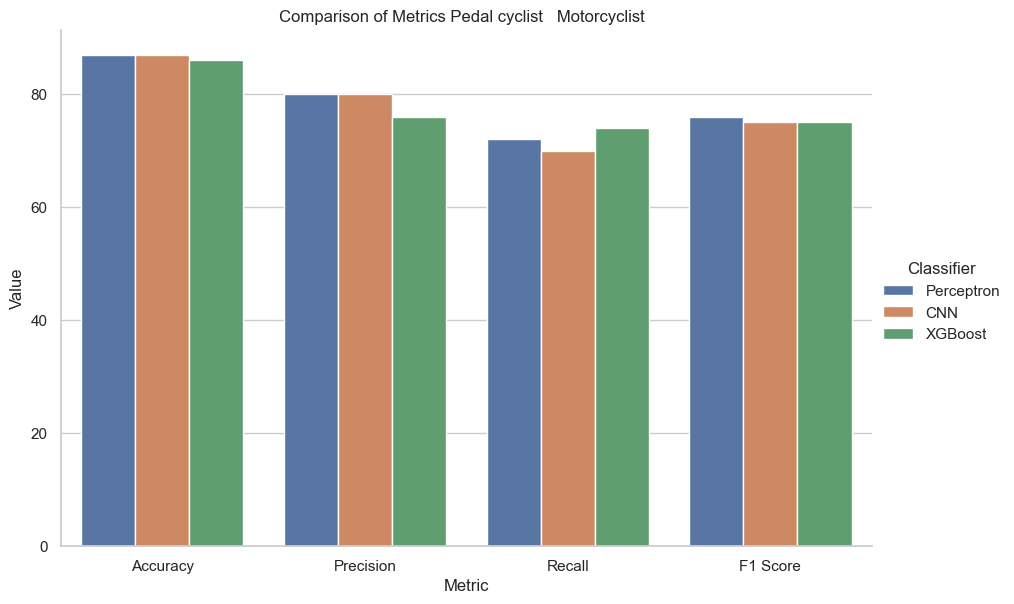

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

classifiers = ["Perceptron", "CNN", "XGBoost"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

data = {
    "Classifier": sum([[c] * len(metrics) for c in classifiers], []),
    "Metric": metrics * len(classifiers),
    "Value": [87, 80, 72, 76,
              87, 80, 70, 75,
              86, 76, 74, 75]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

g = sns.catplot(
    x="Metric", y="Value", hue="Classifier",
    data=df, kind="bar",
    height=6, aspect=1.5
)

plt.title('Comparison of Metrics Pedal cyclist   Motorcyclist  ')

plt.show()


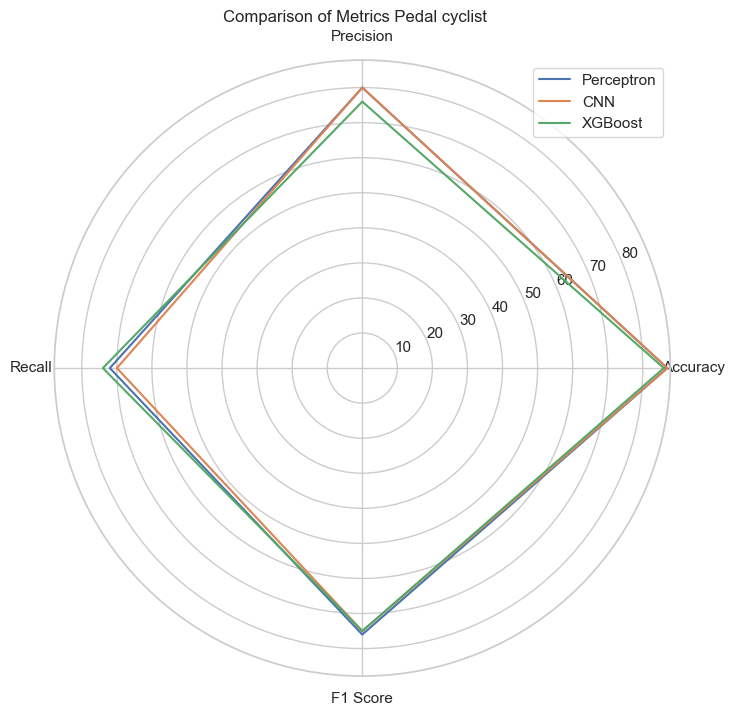

In [32]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
perceptron_values = [87, 80, 72, 76]
cnn_values = [87, 80, 70, 75]
xgboost_values = [86, 76, 74, 75]

num_dimensions = len(labels)

angles = np.linspace(0, 2 * np.pi, num_dimensions, endpoint=False).tolist()

angles += angles[:1]

plt.figure(figsize=(8, 8))

plt.polar(angles, perceptron_values + perceptron_values[:1], label='Perceptron')
plt.polar(angles, cnn_values + cnn_values[:1], label='CNN')
plt.polar(angles, xgboost_values + xgboost_values[:1], label='XGBoost')

plt.xticks(angles[:-1], labels)

plt.title('Comparison of Metrics Motorcyclist   ')

plt.legend()

plt.show()


5-Pedestrian

<Figure size 1200x800 with 0 Axes>

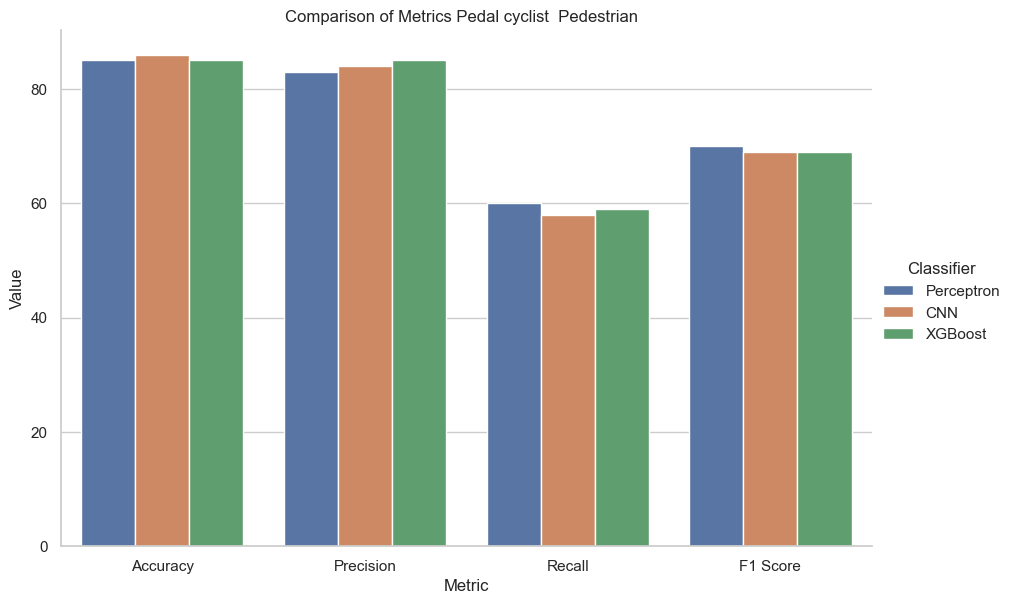

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

classifiers = ["Perceptron", "CNN", "XGBoost"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

data = {
    "Classifier": sum([[c] * len(metrics) for c in classifiers], []),
    "Metric": metrics * len(classifiers),
    "Value": [85, 83, 60, 70,
              86, 84, 58, 69,
              85, 85, 59, 69]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

g = sns.catplot(
    x="Metric", y="Value", hue="Classifier",
    data=df, kind="bar",
    height=6, aspect=1.5
)

plt.title('Comparison of Metrics Pedal cyclist  Pedestrian  ')

plt.show()


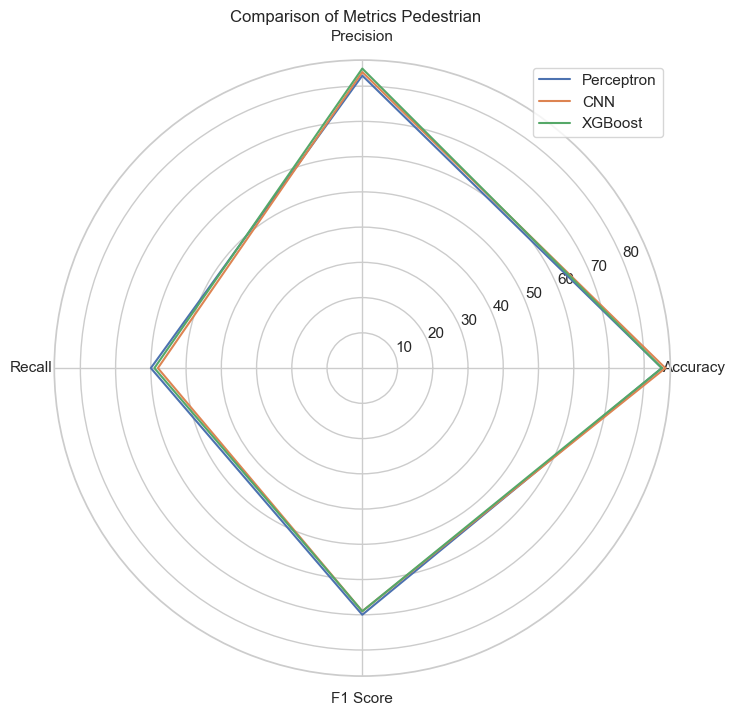

In [35]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
perceptron_values = [85, 83, 60, 70]
cnn_values = [86, 84, 58, 69]
xgboost_values = [85, 85, 59, 69]

num_dimensions = len(labels)

angles = np.linspace(0, 2 * np.pi, num_dimensions, endpoint=False).tolist()

angles += angles[:1]

plt.figure(figsize=(8, 8))

plt.polar(angles, perceptron_values + perceptron_values[:1], label='Perceptron')
plt.polar(angles, cnn_values + cnn_values[:1], label='CNN')
plt.polar(angles, xgboost_values + xgboost_values[:1], label='XGBoost')

plt.xticks(angles[:-1], labels)

plt.title('Comparison of Metrics Pedestrian   ')

plt.legend()

plt.show()
